In [3]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
import matplotlib.pyplot as plt
#matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

8


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=3)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
60000/60000 [==============================] - 147s 2ms/step - loss: 0.2099 - acc: 0.9362
Epoch 2/3
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0834 - acc: 0.9739
Epoch 3/3
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0563 - acc: 0.9823


8


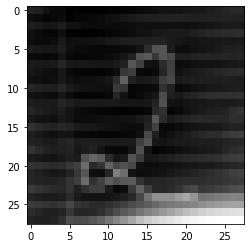

In [9]:
import cv2
from skimage.color import rgb2gray
from skimage.transform import resize

img_rows, img_cols = 28, 28

image_original=cv2.imread(r"C:\Users\vernyjmo\Google Drive\Maestria\5 Cuatrimestre\Reconocimiento de Patrones\Proyecto_Final\Numeros\2_prueba.png")
image_original_gray = rgb2gray(image_original)
image_original_gray_res = resize(image_original_gray, (28,28))

#image1 = image_original.reshape(367500, 28, 28,1)
#prediction = model.predict(r'C:\Users\vernyjmo\Google Drive\Maestria\5 Cuatrimestre\Reconocimiento de Patrones\Proyecto_Final\Numeros\1.jpg')

#print(prediction)

image_index = 3333
plt.imshow(image_original_gray_res.reshape(28, 28),cmap='Greys')
pred = model.predict(image_original_gray_res.reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

#model.evaluate(x_test, y_test)